# COGS 108 Final Project - Impact of Pollution & Socioeconomic Status on Yelp Park Ratings in San Diego

# Overview

In this analysis, I aimed to answer the question of whether parks in higher socioeconomic areas and lower environmental pollution receive higher ratings on Yelp using data visualization, Pearson correlations, a pivot table, linear regression modeling, and OLS regressions. When grouped by zip code, my analysis showed a moderate negative correlation and strong effect between socioeconomic status and Yelp park ratings and no correlation between pollution and Yelp park ratings. In conclusion, the results indicate that an area's pollution levels did not affect Yelp park ratings and that there is a significant and moderate negative correlation between socioeconomic status and Yelp park ratings in San Diego.

# Name & GitHub

- Name: Emily Wu
- GitHub Username: emilyywu

# Research Question

 
What is the relationship between an area's environmental pollution levels, socioeconomic status, and park ratings in the area in San Diego? Do parks in San Diego zip codes with lower environmental pollution levels and higher socioeconomic status receive higher reviews on Yelp? 


## Background and Prior Work

Many studies demonstrate how access to green space can greatly improve one’s health both physically and mentally. For example, a report from the World Health Organization Regional Office for Europe found that people’s physical health improved with regular use of green space, as it reduces morbidity and prevents early mortality by alleviating stress, encourages physical activity and social interaction, and provides an escape from the air pollution and noise of urban living (1). Despite the demonstrated relationship between green space and health, parks are often not equally distributed throughout cities and reflect social and environmental inequities and that makes it difficult for some populations to reap the health benefits of green space. 
 
Unequal access to green space is demonstrated in professor and chair of the Department of Environmental Health Sciences at UCLA Michael Jerrett’s work, who conducted multiple studies that demonstrate stark differences in the quantity and quality of parks between low-income and higher-income areas in Los Angeles and other cities (2). A 2010 report from the San Diego Foundation found similar results, in that although there is ample green space within the county, many areas that are of lower income or that have higher racial or ethnic diversity do not have parks that are easily accessible to them (3). A 2020 update to this report identified that many issues of equity barriers such as safety, walkability, and transportation, exist in San Diego and greatly contribute to the lack of equal access to parks in the county (3). The social inequity reflected in park placement in Los Angeles and San Diego is not unique and is also a pattern throughout the United States, as a study of 14,000 U.S. cities conducted by the Trust for Public Trust found that public parks in low income neighborhoods are about a quarter of the size and 4 times as crowded as parks in high-income areas (4). 

In addition to the inequities of one’s built environment, environmental inequity also plays a role in health as many factories, waste treatment plants, chemical, and manufacturing plants are placed in areas of a lower socioeconomic status, thus exposing the residents to environmental hazards through drinking water, air pollution, ozone, and other chemicals (5). Due to heightened environmental hazards, vulnerable communities would greatly benefit from parks and the health benefits they can provide visitors due to their ability to alleviate stress, increase physical activity, lower temperatures, reduce air pollutants, and reduce UV exposure as stated by the National Recreation and Park Association (6). These findings collectively indicate that park placement and size in the United States differ according to the socioeconomic status of communities. Thus, studying and understanding these patterns is crucial in creating equitable access to high quality parks and promoting public health specifically in communities of lower socioeconomic status.

References:
- 1) https://www.euro.who.int/en/health-topics/environment-and-health/urban-health/publications/2016/urban-green-spaces-and-health-a-review-of-evidence-2016#:~:text=Urban%20green%20spaces%2C%20such%20as,and%20reducing%20exposure%20to%20air 
- 2) https://newsroom.ucla.edu/stories/public-health-experts-find-poor-neighborhoods-lack-access-to-parks-open-space 
- 3) https://www.sdfoundation.org/wp-content/uploads/2020/09/TSDF-Parks-for-Everyone-2-Report.pdf 
- 4) https://www.tpl.org/sites/default/files/The-Heat-is-on_A-Trust-for-Public-Land_special-report.pdf  
- 5) https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2640517/ 
- 6) https://www.nrpa.org/globalassets/research/nowak-heisler-summary.pdf 


# Hypothesis


I hypothesize that San Diego parks in communities of higher socioeconomic status will have higher reviews on Yelp. Many studies in various U.S. cities have indicated that parks in higher income neighborhoods are larger and less crowded than parks in neighborhoods of lower socioeconomic status, which may lead to higher Yelp reviews. Environmental inequity and the placement of factories and plants in lower socioeconomic areas also leads me to hypothesize that parks in higher socioeconomic areas will receive higher reviews due to fewer environmental hazards in the area.

# Dataset(s)

- Dataset Name: California Environmental Health Screening Data
- Link to the dataset: dataset was provided in COGS 108 repo on Github
- Number of observations: 8035 observations

This dataset provides information about different environmental and population characteristics in neighborhoods in California. It also provides information about California neighborhood's CalEnviroScore 2.0 that is given to each neighborhood based on its pollution burden and population characteristics scores.

- Dataset Name: Yelp Data for San Diego Park Information
- Link to the dataset: https://data.ca.gov/dataset/calenviroscreen-2-0
- Number of observations: 833 observations

This dataset provides information about yelp ratings and the number of reviews for various parks in San Diego. 

I plan to combine these datasets using the zip code information provided on both datasets to examine the relationship between an area's  pollution, socioeconomic status, and average Yelp ratings for parks in the area. 

# Setup

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import patsy
import statsmodels.api as sm

In [2]:
# read in data
ca_env = pd.read_csv('calenviroscreen-final-report.csv')
yelp = pd.read_csv('yelp_SD_parks.csv')

# Data Cleaning

To make analysis easier, I removed unnecessary columns, removed or checked for missing values, and renamed columns. I first began by cleaning the California Environmental Health Screening Data. 

In [5]:
# drop columns that are unnecessary for this analysis
ca_env = ca_env.drop(columns = ['Census Tract', 'Total Population', 
       'Click for interactive map','Hyperlink','CES 2.0 Percentile Range', 'Ozone','Ozone Pctl',
       'PM2.5','PM2.5 Pctl', 'Pollution Burden', 'Pollution Burden Pctl', 
       'Education','Education Pctl','Diesel PM', 'Diesel PM Pctl', 'Drinking Water', 
       'Poverty','Poverty Pctl','Drinking Water Pctl', 'Pesticides', 'Pesticides Pctl', 
       'Tox. Release','Tox. Release Pctl', 'Traffic', 'Traffic Pctl', 'Cleanup Sites',
       'Cleanup Sites Pctl', 'Groundwater Threats', 'Groundwater Threats Pctl',
       'Haz. Waste', 'Haz. Waste Pctl', 'Imp. Water Bodies',
       'Imp. Water Bodies Pctl', 'Solid Waste', 'Solid Waste Pctl',
       'Pop. Char. ','Age', 'Age Pctl', 'Asthma', 'Asthma Pctl', 'Low Birth Weight',
       'Low Birth Weight Pctl', 'Linguistic Isolation', 'Linguistic Isolation Pctl', 
       'Education Pctl', 'Unemployment', 'Unemployment Pctl', 'Pop. Char. Pctl' ])

In [60]:
# sd_env contains entries for San Diego county only
sd_env = ca_env[ca_env['California County'] == 'San Diego']

# checking for rows with missing values for the CES 2.0 Score in sd_env 
missing = sd_env[sd_env.isnull().any(axis=1)]
missing.shape

(4, 5)

In [7]:
# drop missing rows with missing values for for CES 2.0 score 
sd_env = sd_env.dropna(subset=['CES 2.0 Score'])

In [8]:
# function to extract zip code from location column of sd_env
def get_zipcode(location):
    zipcode = location[location.find('\n')-5:location.find('\n')]
    return zipcode

sd_env['Location 1'] = sd_env['Location 1'].apply(get_zipcode)
sd_env.rename(columns={'Location 1':'zip_code'}, inplace=True)

Next, I am cleaning the Yelp data on San Diego parks before merging the two dataframes using the zip code information in both dataframes.

In [9]:
# drop unnecessary columns for analysis
yelp = yelp.drop(columns = ['phone', 'id', 'url', 'longitude', 'latitude','is_closed'])

In [10]:
# check for missing values in yelp
yelp.isnull().values.any()

False

In [11]:
# function to extract zip code from address column of yelp dataset
def yelp_zipcode(address):
    zipc = address[address.find(',')+5:address.find(',')+10]
    return zipc

yelp['address'] = yelp['address'].apply(yelp_zipcode)
yelp.rename(columns={'address':'zip_code'}, inplace=True)

In [12]:
# merge datasets based on zip code
both = pd.merge(sd_env, yelp, on = 'zip_code')
both['zip_code'] = both['zip_code'].astype('int32')

In [13]:
# create new data frame only with observations about san diego parks
df = both.loc[both['name'].str.contains('Park')]

In [14]:
# drop any remaining observations that are not parks
df = df.drop(df.loc[df['name'].str.contains('El Camino')].index)
df = df.drop(df.loc[df['name'].str.contains('Mortuary')].index)
df = df.drop(df.loc[df['name'].str.contains('Grill')].index)
df = df.drop(df.loc[df['name'].str.contains('Villas')].index)
df = df.drop(df.loc[df['name'].str.contains('Zoo')].index)
df = df.drop(df.loc[df['name'].str.contains('Nursery')].index)
df = df.drop(df.loc[df['name'].str.contains('Taste')].index)
df = df.drop(df.loc[df['name'].str.contains('Apartment')].index)
df = df.drop(df.loc[df['name'].str.contains('Spirits')].index)
df = df.drop(df.loc[df['name'].str.contains('Observatory')].index)
df = df.drop(df.loc[df['name'].str.contains('Massage')].index)
df = df.drop(df.loc[df['name'].str.contains('Produce')].index)
df = df.drop(df.loc[df['name'].str.contains('Urbn')].index)
df = df.drop(df.loc[df['name'].str.contains('Paintball')].index)
df = df.drop(df.loc[df['name'].str.contains('Horton')].index)
df = df.drop(df.loc[df['name'].str.contains('Encontro')].index)
df = df.drop(df.loc[df['name'].str.contains('Petco')].index)
df = df.drop(df.loc[df['name'].str.contains('Belmont')].index)

In [15]:
# number of sd parks for analysis 
df['name'].nunique()

233

In [16]:
# rename columns
df.rename(columns={'CES 2.0 Score':'CES_score'}, inplace=True)
df.rename(columns={'Ozone':'ozone'}, inplace=True)
df.rename(columns={'Pollution Burden Score':'pollution_score'}, inplace=True)
df.rename(columns={'Education':'education'}, inplace=True)
df.rename(columns={'Poverty':'poverty'}, inplace=True)
df.rename(columns={'Pop. Char. Score':'pop_char_score'}, inplace=True)

In [17]:
# examine cleaned dataset
df.head()

,California County,CES_score,pollution_score,pop_char_score,zip_code,name,rating,review_count
0,San Diego,59.91,7.203297,8.316532,92113,Memorial Skate Park,3.5,7
3,San Diego,59.91,7.203297,8.316532,92113,John F Kennedy Park,4.5,3
4,San Diego,59.91,7.203297,8.316532,92113,Dorothy Petway Neighborhood Park,1.5,3
5,San Diego,55.61,6.645896,8.367767,92113,Memorial Skate Park,3.5,7
8,San Diego,55.61,6.645896,8.367767,92113,John F Kennedy Park,4.5,3


This dataset now has information about the CalEnviroScreen data for zip codes in San Diego county only. According to the CalEnviroScreen site from which this dataset was taken, the pollution burden score is calculated based on the scaled average of the percentiles from the following variables:

  - **Ozone:** amount of ozone concentration that exceeds the state 
      standard measured over the daily maximum of 8 hours 
  - **PM 2.5:** annual mean of particulate matter 2.5 concentrations
  - **Diesel PM:** diesel particulate matter emissions 
  - **Drinking water:** level of selected contaminants in drinking 
    water
  - **Pesticides:** total pounds of selected active pesticide ingredients   used in production-agriculture per square mile in the census tract
  - **Toxic release:** toxicity concentrations of chemical releases to 
  air from facilities and off-site incineration from EPA's Risk-
  Screening Environmental Indicators Model (RSEI)
  - **Traffic:** traffic density measured in vehicle-kilmeters per hour 
  per road length, within 150 meters of the census tract boundary
  - **Cleanup sites:** sum of EnviroStor cleanup sites within buffered 
  distances to census tracts
  - **Groundwater threats:** sum of weighted GeoTracker information about leaking underground storage tank sites within buffered distances to census tracts
  - **Hazardous waste:** sum of weighted hazardous waste facilities and large quantity generators within buffered distances to census tracts
  - **Impaired water bodies:** sum of number of pollutants across all impaired water bodies within buffered distances to census tracts
  - **Solid waste:** sum of weighted solid waste sites and facilities within buffered distances to census tracts

The population characteristics score is calculated similarly to the pollution burden score and is an average of percentiles from the population characteristics indicators listed below:

- **Age:** percent of population under age 10 and over age 65
- **Asthma:** Age-adjusted number of emergency department visits for asthma
- **Low birth weight:** percent of births with low weight
- **Education:** percent of population over 25 with less than a high school education
- **Linguistic isolation:** percent of households in which no one  age 14 and over speaks English "very well" or only speaks English  
- **Poverty:** percent of population living below two times the federal poverty level
- **Unemployment:** percent of the population over the age of 16 that is unemployed and eligible for the labor force

The CalEnviroScreen (CES 2.0) score is calculated by multiplying the pollution burden and population characteristics score of an area. In relation to my research question, I will be using CES 2.0 scores as a combined measure of pollution and socioeconomic status together, pollution burden scores as a measure of pollution levels, and population characteristics scores as a measure of socioeconomic status. 


The dictionary containing definitions of the columns in the California Environmental Health Screening dataset can be found here:
https://data.ca.gov/dataset/calenviroscreen-2-0/resource/cb5fe61f-a1af-4e53-83e2-fd3e19d0e707

# Data Analysis & Results

### EDA & Data Visualization  

I began by making initial data visualizations to explore the data before running other analyses. 

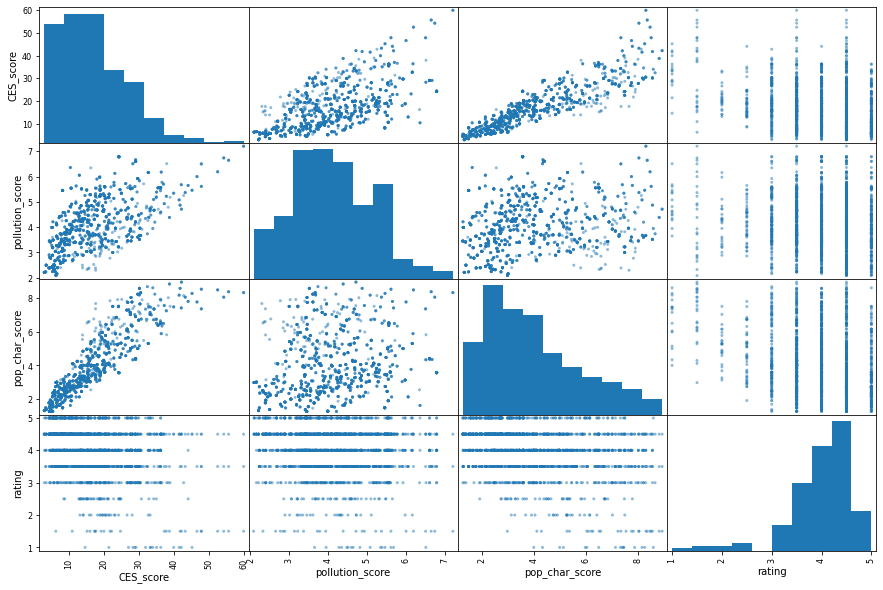

In [18]:
overallmatrix = pd.plotting.scatter_matrix(df[['CES_score', 'pollution_score','pop_char_score', 'rating']], figsize = (15,10))

Figure 1. This scatter matrix visualizes relationships between pollution burden scores, population characteristic scores, CES 2.0 scores, and some of the indicators that are accounted for in the calculation of the three scores. Upon initial examination, there are not any strong correlations between pollution levels or socioeconomic status and Yelp park ratings.

#### EDA of San Diego Parks' Yelp Ratings 

Text(0, 0.5, 'Yelp Rating')

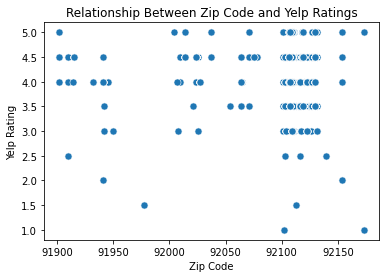

In [19]:
g1 = sns.scatterplot(x = df['zip_code'], y = df['rating'], s=50)
g1.set_title('Relationship Between Zip Code and Yelp Ratings')
g1.set_xlabel('Zip Code')
g1.set_ylabel('Yelp Rating')

Figure 2. This diagram plots a Yelp ratings for parks in a few of San Diego's zip codes. Although this does not show reviews for parks in all San Diego zip codes, upon initial analysis, it seems zip codes and park ratings are not correlated as many of the zip codes shown here have a spread of Yelp ratings for parks in the area. 

Text(0, 0.5, 'Frequency')

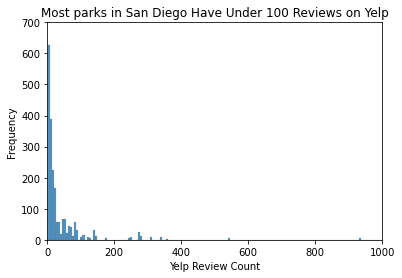

In [20]:
# histogram of yelp review count
g2 = sns.histplot(df['review_count'])
plt.xlim(0, 1000)
plt.ylim(0, 700)
g2.set_title('Most parks in San Diego Have Under 100 Reviews on Yelp')
g2.set_xlabel('Yelp Review Count')
g2.set_ylabel('Frequency')

Text(0, 0.5, 'Frequency')

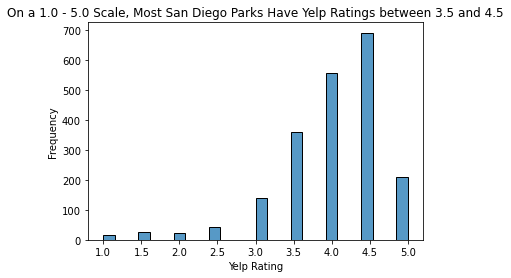

In [21]:
# distribution of yelp ratings  
g3 = sns.histplot(df['rating'])
g3.set_title('On a 1.0 - 5.0 Scale, Most San Diego Parks Have Yelp Ratings between 3.5 and 4.5')
g3.set_xlabel('Yelp Rating')
g3.set_ylabel('Frequency')

Text(0, 0.5, 'Yelp Review Count')

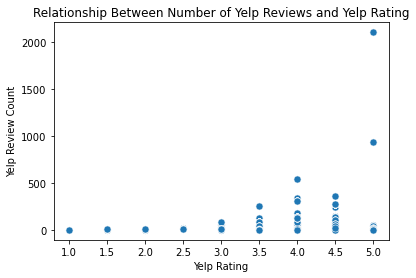

In [22]:
g4 = sns.scatterplot(x = df['rating'], y = df['review_count'], s=50)
g4.set_title('Relationship Between Number of Yelp Reviews and Yelp Rating')
g4.set_xlabel('Yelp Rating')
g4.set_ylabel('Yelp Review Count')

Figure 3. This scatterplot shows that Yelp ratings between 1.0-2.5 generally had a low review count. There is more variability in review count once the rating reaches 3.0 and above, indicating that a review count is not strongly correlated with rating, if at all and is not a confounding variable in this analysis.

#### EDA of Pollution Burden Scores, Population Characteristics Scores, and CES 2.0 Scores

Text(0, 0.5, 'Frequency')

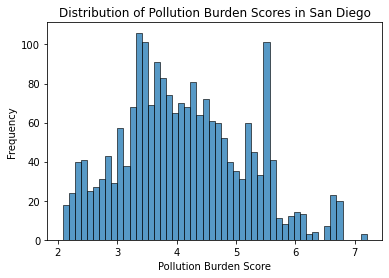

In [23]:
# distribution of pollution burden scores
g5 = sns.histplot(df['pollution_score'], bins=50)
g5.set_title('Distribution of Pollution Burden Scores in San Diego')
g5.set_xlabel('Pollution Burden Score')
g5.set_ylabel('Frequency')

Figure 4. Most pollution burden scores for zip codes in San Diego generally fall between roughly 3 and 5.5. Pollution burden scores are scaled from 1-10, with 1 indicating a low pollution burden and 10 indicating a high pollution burden.

Text(0, 0.5, 'Frequency')

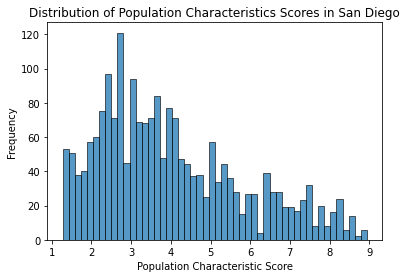

In [24]:
# distribution of population characteristic scores
g6 = sns.histplot(df['pop_char_score'], bins=50)
g6.set_title('Distribution of Population Characteristics Scores in San Diego')
g6.set_xlabel('Population Characteristic Score')
g6.set_ylabel('Frequency')

Figure 5. Most population characteristics scores for zip codes in San Diego are relatively low and roughly fall between 1 and and 4. Population characteristics scores are scaled from 1-10, with 1 indicating a less sensitive population and higher socioeconomic status, while a 10 indicates a more sensitive population and lower socioeconomic status, according to the report with additional information regarding the CalEnviroScreen 2.0 Data (https://data.ca.gov/dataset/calenviroscreen-2-0/resource/e5f71995-e879-4e19-a74b-33badbfb0830). 

Text(0, 0.5, 'Frequency')

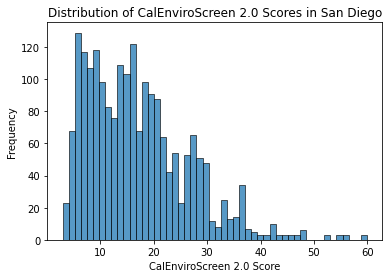

In [25]:
# distribution of CES 2.0 scores
g7 = sns.histplot(df['CES_score'], bins=50)
g7.set_title('Distribution of CalEnviroScreen 2.0 Scores in San Diego')
g7.set_xlabel('CalEnviroScreen 2.0 Score')
g7.set_ylabel('Frequency')

Figure 6. Most San Diego zip codes received a CalEnviroScreen 2.0 score of less than 40, which is relatively low. CalEnviroScreen 2.0 scores are scaled from 0-100, with 0 indicating a low pollution burden and high socioeconomic status, and 100 indicating a high pollution burden and low socioeconomic status.

#### EDA of the Relationship between Pollution, Socioeconomic Status, and Yelp Ratings of San Diego Parks

This section explores whether there is a general relationship between pollution burden scores, population characteristics scores, CES 2.0 scores, and Yelp park ratings in San Diego. The scores have not been grouped by zip code.

Text(0, 0.5, 'Population Characteristics Score')

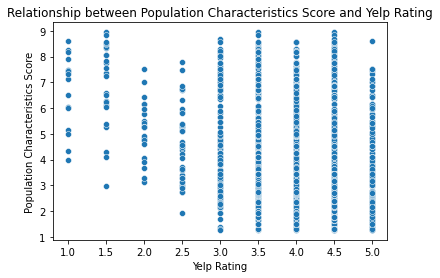

In [26]:
g8 = sns.scatterplot(x = df['rating'], y = df['pop_char_score'])
g8.set_title('Relationship between Population Characteristics Score and Yelp Rating')
g8.set_xlabel('Yelp Rating')
g8.set_ylabel('Population Characteristics Score')

Figure 7. This scatterplot shows high variability between Yelp ratings of San Diego parks based on the population characteristics score of the parks' zip codes alone, suggesting no correlation between the socioeconomic status and Yelp park ratings.

Text(0, 0.5, 'Pollution Burden Score')

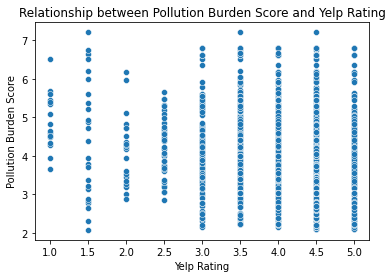

In [27]:
g9 = sns.scatterplot(x = df['rating'], y = df['pollution_score'])
g9.set_title('Relationship between Pollution Burden Score and Yelp Rating')
g9.set_xlabel('Yelp Rating')
g9.set_ylabel('Pollution Burden Score')

Figure 8. Similarly to figure 7, the high variability of pollution burden scores within Yelp ratings also suggests no correlation between pollution burden scores and the Yelp park ratings.

Text(0, 0.5, 'CalEnviroScreen 2.0 Score')

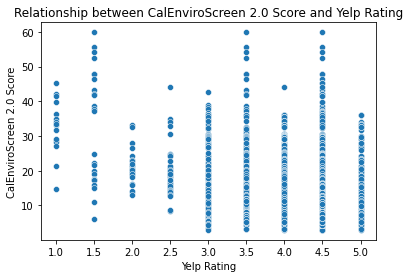

In [28]:
g10 = sns.scatterplot(x = df['rating'], y = df['CES_score'])
g10.set_title('Relationship between CalEnviroScreen 2.0 Score and Yelp Rating')
g10.set_xlabel('Yelp Rating')
g10.set_ylabel('CalEnviroScreen 2.0 Score')

Figure 9. Similarly to figures 7 and 8, the high variability in Yelp ratings in this diagram also shows no correlation between a neighborhood's CalEnviroScreen 2.0 score and Yelp park ratings. This was expected as there was no correlation between pollution burden scores and population characteristics scores, which are used to calculate CalEnviroScreen 2.0 scores.

Based on my initial EDA, there was no correlation between general pollution level, socioeconomic status, and Yelp park ratings, but a Pearson correlation will confirm these findings.

#### Pearson Correlation

In [29]:
# Pearson correlation between pollution burden, pop characteristics, and 
# CES 2.0 scores before grouping by zip code
df.corr(method='pearson')

,CES_score,pollution_score,pop_char_score,zip_code,rating,review_count
CES_score,1.000000,0.609219,0.886133,-0.047337,-0.293199,0.008523
pollution_score,0.609219,1.000000,0.225909,0.036548,-0.110252,0.077182
pop_char_score,0.886133,0.225909,1.000000,-0.078064,-0.312392,-0.040640
zip_code,-0.047337,0.036548,-0.078064,1.000000,0.065153,0.004059
rating,-0.293199,-0.110252,-0.312392,0.065153,1.000000,0.136541
review_count,0.008523,0.077182,-0.040640,0.004059,0.136541,1.000000


The rating column of this Pearson correlation table confirms earlier findings, as the correlation coefficients between CES score and rating (-0.293199), pollution burden score and rating (-0.110252), and population characteristics score and rating (-0.312392), all indicate a negligible correlation. 

### Analysis of Pollution, Socioeconomic Status, and San Diego Parks' Yelp Ratings as Grouped by Zip Code

Although there was not a strong correlation between the general distributions of pollution burdens scores, population characteristics, and Yelp ratings of parks, I will be grouping data by zip code to answer my research question. 

In [30]:
# find average pollution burden scores by zip code
pollution = df.groupby('zip_code')['pollution_score'].mean()
pollution = pollution.to_frame().reset_index()
pollution.rename(columns={'pollution_score':'avgpollutionbyzip'}, inplace=True)

# find average population characteristics scores by zip code
popchars = df.groupby('zip_code')['pop_char_score'].mean()
popchars = popchars.to_frame().reset_index()
popchars.rename(columns={'pop_char_score':'avgpopcharbyzip'}, inplace=True)

# find average Yelp ratings for parks by zip code
zipgroups = df.groupby('zip_code')['rating'].mean()
zipgroups = zipgroups.to_frame().reset_index()

# find average CES 2.0 score by zip code
cesgroups = df.groupby('zip_code')['CES_score'].mean()
cesgroups = cesgroups.to_frame().reset_index()
cesgroups.rename(columns={'CES_score':'avgCESbyzip'}, inplace=True)

In [31]:
# create new df with average pollution burden scores, average population
# characteristics, and average CES 2.0 scores all grouped by zip code
df2 = pd.merge(pollution, popchars, on = 'zip_code')
df2 = pd.merge(df2, cesgroups, on = 'zip_code')
df2 = pd.merge(df2, zipgroups, on = 'zip_code')
df2.head()

,zip_code,avgpollutionbyzip,avgpopcharbyzip,avgCESbyzip,rating
0,91902,3.405601,4.136556,14.386000,4.500000
1,91910,4.030007,5.508067,22.918824,3.666667
2,91914,2.399685,3.151397,7.560000,4.000000
3,91915,3.371075,2.504677,8.203333,4.500000
4,91932,3.169313,5.564603,17.358333,4.000000


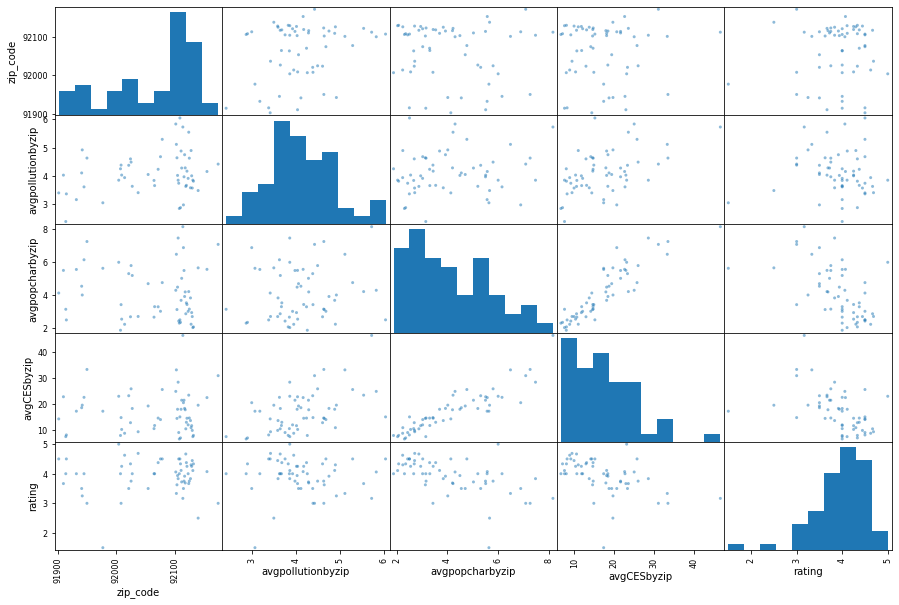

In [32]:
g11 = pd.plotting.scatter_matrix(df2, figsize = (15,10))

Figure 10. This scatter matrix suggests that there may be a stronger negative correlation between average Yelp ratings and average pollution burden, population characteristics, and CES 2.0 scores after being grouped by zip code than in the earlier analysis performed on ratings and the general distributions of the pollution burden, population characteristics, and CES 2.0 scores.

#### Pivot Table

The following pivot table includes 57 San Diego zip codes and their corresponding average pollution burden score, average population characteristics score, average CES 2.0 score, and average Yelp ratings for parks in the area. 

In [33]:
# pivot table showing average pollution burden scores, average population
# characteristics score, average CES 2.0 scores, average yelp ratings 
# grouped by zip code
pv = pd.pivot_table(df2, index = ['zip_code', 'rating'], values= ['avgpollutionbyzip', 'avgpopcharbyzip', 'avgCESbyzip'])
pv

,,avgCESbyzip,avgpollutionbyzip,avgpopcharbyzip
zip_code,rating,,,
91902,4.500000,14.386000,3.405601,4.136556
91910,3.666667,22.918824,4.030007,5.508067
91914,4.000000,7.560000,2.399685,3.151397
91915,4.500000,8.203333,3.371075,2.504677
91932,4.000000,17.358333,3.169313,5.564603
91941,3.500000,18.701111,4.106922,4.548992
91942,3.250000,19.690000,4.916687,4.016890
91945,4.000000,22.696667,3.616842,6.151653
91950,3.000000,33.444286,4.630388,7.257923


The table summarizes the pollution and socioeconomic status of San Diego zip codes for comparison. 

#### Pearson Correlation

In [34]:
# Pearson correlation for averaged scores grouped by zip code
df2.corr(method='pearson')

,zip_code,avgpollutionbyzip,avgpopcharbyzip,avgCESbyzip,rating
zip_code,1.000000,0.256058,-0.084693,0.032550,0.063882
avgpollutionbyzip,0.256058,1.000000,0.130158,0.512604,-0.043439
avgpopcharbyzip,-0.084693,0.130158,1.000000,0.900936,-0.537464
avgCESbyzip,0.032550,0.512604,0.900936,1.000000,-0.464777
rating,0.063882,-0.043439,-0.537464,-0.464777,1.000000


The results of a Pearson correlation support some stronger negative correlational relationships as seen in the scatter matrix a few cells above. Although average pollution by zip code has no correlation with Yelp ratings (coefficient of -0.043439), the average population characteristics score of a zip code has a moderate negative correlation with Yelp ratings with a correlation coefficient of -0.537464, suggesting a relationship between socioeconomic level and the quality of parks in the area.  

Although average CES score and Yelp ratings also has a small negative correlation coefficient of -0.464777, this is likely being driven solely by the relationship between socioeconomic level (population characteristics score) and Yelp ratings, as CES 2.0 scores are a product of the pollution burden and population characteristics, yet there was no correlation between pollution burden and rating. 

### Linear & OLS Regression Models

To better analyze the strength of the relationships between a neighborhood's pollution levels, socioeconomic level, and Yelp ratings of parks in the area, I created several linear regression models using linear and OLS regressions.

#### Model 1. Pollution, Socioeconomic Status, and Average Yelp Ratings for Parks by Zip Code

Text(0, 0.5, 'Average CES 2.0 Score')

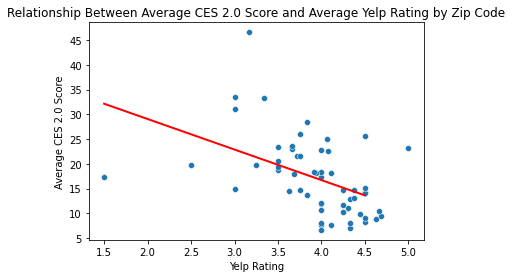

In [35]:
s1 = sns.scatterplot(x = df2['rating'], y = df2['avgCESbyzip'])

a1, b1 = np.polyfit(df2['rating'], df2['avgCESbyzip'], 1)
x1 = np.arange(df2['rating'].min(), df2['rating'].max())
y1 = a1 * x1 + b1

s1 = s1.plot(x1, y1, linewidth = 2, color='r')
plt.title('Relationship Between Average CES 2.0 Score and Average Yelp Rating by Zip Code')
plt.xlabel('Yelp Rating')
plt.ylabel('Average CES 2.0 Score')

This model suggests a weak correlation between average CES 2.0 scores and average Yelp park ratings by zip code. CES 2.0 scores are calculated using both the pollution burden scores and population characteristics scores, so although this model suggests a relationship between pollution, socioeconomic status, and Yelp park ratings, it is possible only pollution or socioeconomic status alone has a genuine correlation and effect on average Yelp park ratings.

#### Model 2. Pollution and Average Yelp Ratings for Parks by Zip Code

Text(0, 0.5, 'Average Pollution Burden Score')

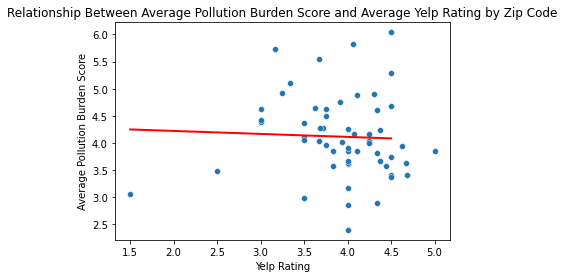

In [36]:
s2 = sns.scatterplot(x = df2['rating'], y = df2['avgpollutionbyzip'])

a2, b2 = np.polyfit(df2['rating'], df2['avgpollutionbyzip'], 1)
x2 = np.arange(df2['rating'].min(), df2['rating'].max())
y2 = a2 * x2 + b2

s2 = s2.plot(x2, y2, linewidth = 2, color='r')
plt.title('Relationship Between Average Pollution Burden Score and Average Yelp Rating by Zip Code')
plt.xlabel('Yelp Rating')
plt.ylabel('Average Pollution Burden Score')

The nearly 0-slope best fit line indicates there is no correlation between the average pollution burden score and average Yelp park ratings in the area. This demonstrates that the part of my hypothesis about high park ratings coinciding with low pollution levels was incorrect and that average pollution burden scores do not influence average Yelp park ratings. 

#### Model 3. Socioeconomic Status and Average Yelp Ratings for Parks by Zip Code

Text(0, 0.5, 'Average Population Characteristics Score')

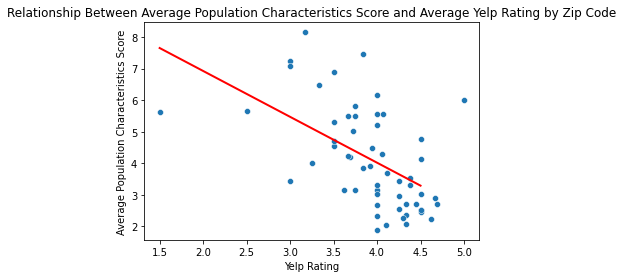

In [37]:
s3 = sns.scatterplot(x = df2['rating'], y = df2['avgpopcharbyzip'])

a3, b3 = np.polyfit(df2['rating'], df2['avgpopcharbyzip'], 1)
x3 = np.arange(df2['rating'].min(), df2['rating'].max())
y3 = a3 * x3 + b3

s3 = s3.plot(x3, y3, linewidth = 2, color='r')
plt.title('Relationship Between Average Population Characteristics Score and Average Yelp Rating by Zip Code')
plt.xlabel('Yelp Rating')
plt.ylabel('Average Population Characteristics Score')

As seen by the steeper best-fit line, there is a moderate negative correlation between socioeconomic status and park ratings, as measured by the average population characteristics score and average Yelp ratings for parks by zip code. Combined with the correlation coefficient analysis earlier, this shows that as the average population characteristics score increases, average Yelp park ratings decrease. 

After running Models 2 and 3 and seeing no correlation between pollution and Yelp park ratings, the correlation between CES 2.0 scores and Yelp ratings in Model 1 is likely reflecting the correlation between socioeconomic status and Yelp ratings. It is not genuine evidence that pollution and socioeconomic status together have a collective effect on Yelp ratings.

### OLS Regressions

#### Regression Results 1.  Pollution, Socioeconomic Status and Yelp Rating

In [58]:
rating = df2['rating']
avgCESbyzip = df2['avgCESbyzip']
outcome_1, predictors_1 = patsy.dmatrices('rating ~ avgCESbyzip', df2)
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.216
Model:                            OLS   Adj. R-squared:                  0.202
Method:                 Least Squares   F-statistic:                     15.15
Date:                Tue, 15 Dec 2020   Prob (F-statistic):           0.000270
Time:                        14:08:46   Log-Likelihood:                -43.463
No. Observations:                  57   AIC:                             90.93
Df Residuals:                      55   BIC:                             95.01
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       4.5225      0.170     26.642      

The interpretation of this regression is similar to the note in model 3 of the previous section, in that the R-squared value of 0.216 and p-value of less than 0.001 are likely reflecting the moderate correlation and large effect size of socioeconomic status on Yelp ratings. This does not provide support for a correlation or effect between average CES 2.0 scores by zip code and average Yelp park ratings by zip code, as CES 2.0 scores take pollution and socioeconomic status into account.

#### Regression Results 2. Pollution and Yelp Rating

In [57]:
# regression for avg pollution by zip and rating
rating = df2['rating']
avgpollutionbyzip = df2['avgpollutionbyzip']
outcome_2, predictors_2 = patsy.dmatrices('rating ~ avgpollutionbyzip', df2)
mod_2 = sm.OLS(outcome_2, predictors_2)
res_2 = mod_2.fit()
print(res_2.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.016
Method:                 Least Squares   F-statistic:                    0.1040
Date:                Tue, 15 Dec 2020   Prob (F-statistic):              0.748
Time:                        14:08:31   Log-Likelihood:                -50.345
No. Observations:                  57   AIC:                             104.7
Df Residuals:                      55   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             4.0619      0.44

The R-squared value of 0.002 is very small and indicates that very little of the Yelp rating data can be predicted by the average pollution burden score of zip codes. The p-value of 0.748 is also higher than the alpha value of 0.05, indicating an insignificant effect.

#### Regression Results 3. Socioeconomic Status and Yelp Rating

In [52]:
avgpopcharbyzip = df2['avgpopcharbyzip']
outcome_3, predictors_3 = patsy.dmatrices('rating ~ avgpopcharbyzip', df2)
mod_3 = sm.OLS(outcome_3, predictors_3)
res_3 = mod_3.fit()
print(res_3.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.289
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     22.34
Date:                Tue, 15 Dec 2020   Prob (F-statistic):           1.63e-05
Time:                        14:06:19   Log-Likelihood:                -40.683
No. Observations:                  57   AIC:                             85.37
Df Residuals:                      55   BIC:                             89.45
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           4.7399      0.186     

The R-squared value of 0.289 indicates that some of the Yelp rating data can be predicted by the population characteristics scores, which supports the moderate correlation shown in Model 2. The p-value is also significant because it is less than .001 and is less than an alpha value of 0.05, which shows that the average population characteristics scores by zip code have a large effect on average Yelp park ratings by zip code. These findings show a moderate correlation and large effect size between socioeconomic level and Yelp park ratings.

# Ethics & Privacy

Much of this project focuses on examining areas of social inequity with a focus on park ratings in San Diego. Although my intention for my research question and analysis to be used to work towards eliminating social inequities and providing more resources to disadvantaged communities in San Diego, I recognize that some of the data used in this analysis can be used for unethical purposes. 

All of the data used in this project was provided, is publicly available, and does not include any personally identifiable information. All the information in the Yelp dataset about parks in San Diego, including the addresses, ratings, and review counts for the parks, are available on Yelp’s website. The California Environmental Health Screening Data is also publicly available on the ca.gov website, but contains more sensitive information about pollution levels and population characteristics. Specifically, all of the variables used to calculate the population characteristics score, such as poverty levels, unemployment, and educational attainment, could be used unethically to identify and target disadvantaged, vulnerable communities. Additionally, this data was collected and published by the Office of Environmental Health Hazard Assessment (OEHHA) for the California Environmental Protection Agency (CalEPA) and there could be biases in the variable selection or data collection processes.

# Conclusion & Discussion

To operationalize the variables in my research question, I used pollution burden scores to measure pollution, population characteristics scores to measure socioeconomic level, and CES 2.0 scores as a measure of both pollution and socioeconomic status. To answer my research question of whether parks in San Diego neighborhoods with a higher socioeconomic status and lower environmental pollution levels receive higher reviews on Yelp, my hypothesis was correct about an effect of socioeconomic level, but incorrect about an effect of pollution levels on average Yelp park ratings. My analyses showed a moderate negative correlation and large effect between socioeconomic status and Yelp park ratings, which supports the part of my hypothesis stating that parks in zip codes that are of a higher socioeconomic status receive higher Yelp ratings. There was no evidence of a relationship between pollution levels and Yelp park ratings by zip code, which leads me to conclude that pollution has no effect on Yelp park ratings in San Diego. 
 
Some limitations of this analysis could be that the total number of reviews for parks differed across zip codes, meaning that some ratings may be more accurate and representative of Yelp users’  than others, due to a high review count. All the park ratings are also taken from Yelp and thus are only reflective of Yelp users’ opinions. I also used scores in the CalEnviroScreen dataset to operationalize the pollution and socioeconomic level variables in my research question, which are not perfect measures of the variables of interest, as these scores were calculated with a curated list of variables chosen by the Office of Environmental Health Hazard Assessment (OEHHA). To account for this, I have listed all the variables included in the calculation of these scores in the Data Cleaning section of my report for transparency and further research purposes. The CalEnviroScreen 2.0 data and report was published in October 2014 and it is possible some of the data has changed between then and now, which can alter analysis results. Lastly, this analysis focused on pollution, socioeconomic level, and park ratings in San Diego and is likely not generalizable to other cities. 